# **Multiple linear regression on the bike sharing dataset.**


# Reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.head()  #using interactive table

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape  # rows,columns

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.info

<bound method DataFrame.info of      instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  01-01-2018       1   0  ...  10.749882     331         654   985
1          2  02-01-2018       1   0  ...  16.652113     131         670   801
2          3  03-01-2018       1   0  ...  16.636703     120        1229  1349
3          4  04-01-2018       1   0  ...  10.739832     108        1454  1562
4          5  05-01-2018       1   0  ...  12.522300      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
725      726  27-12-2019       1   1  ...  23.458911     247        1867  2114
726      727  28-12-2019       1   1  ...  10.416557     644        2451  3095
727      728  29-12-2019       1   1  ...   8.333661     159        1182  1341
728      729  30-12-2019       1   1  ...  23.500518     364        1432  1796
729      730  31-12-2019       1   1  ...  10.374682     439        2290  2729

[730 rows x 16 colu


# Visualizing

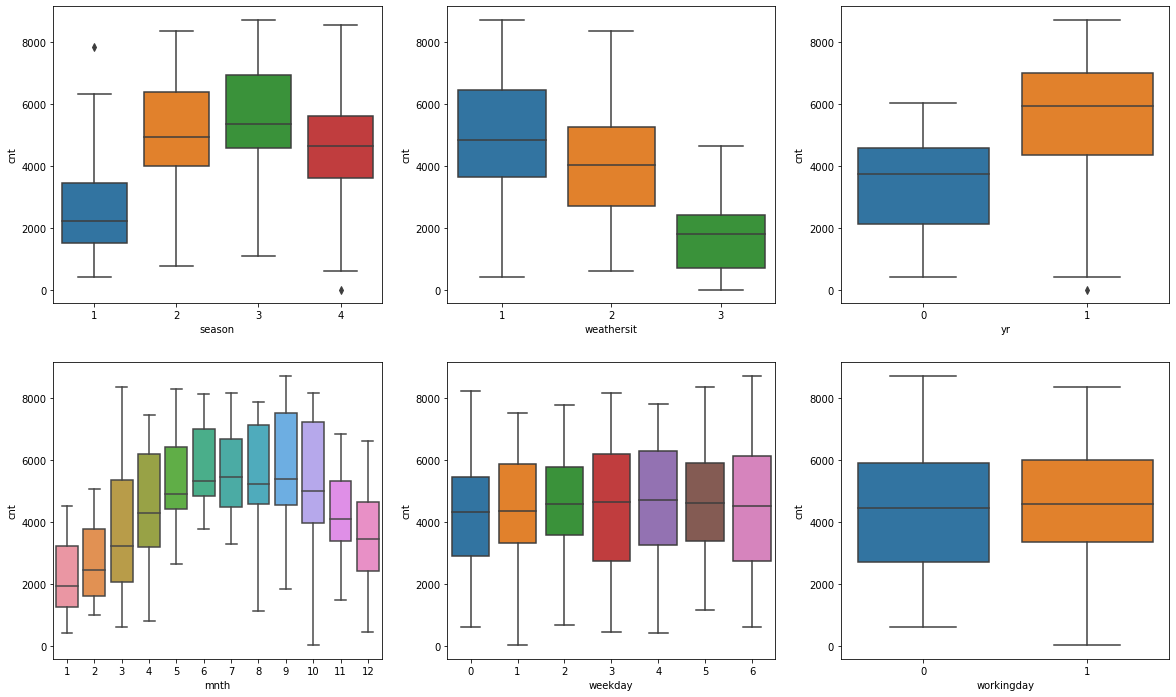

In [7]:
#Categorical variables against each other in box plots
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [8]:
#splitting the data 
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train,df_test = train_test_split(bike,train_size = 0.7, test_size= 0.3 , random_state=100)


In [9]:
#rescaling to 0 and 1 

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

In [10]:
num_vars= ['temp'	,'atemp'	,'hum'	,'windspeed',	'casual',	'registered',	'cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [11]:
df_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,654,16-10-2019,4,1,10,0,2,1,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,577,31-07-2019,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,427,03-03-2019,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,729,30-12-2019,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,483,28-04-2019,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


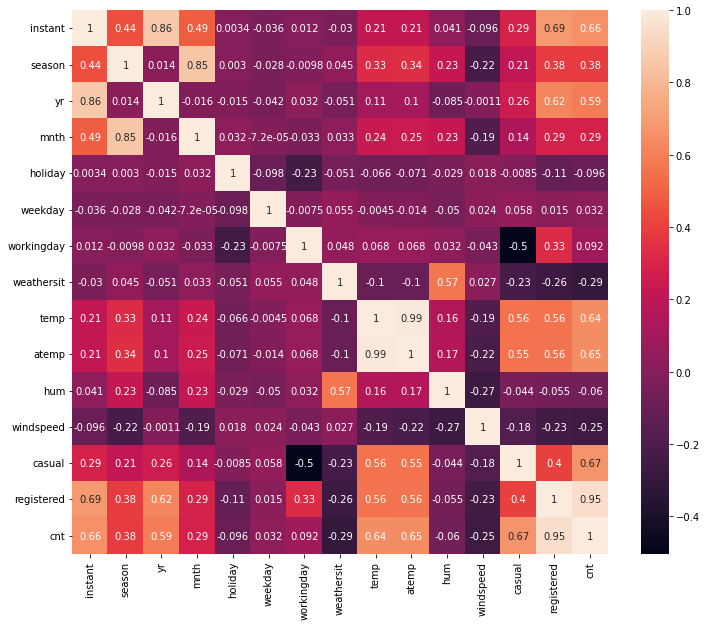

In [12]:
# finding correlation
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot= True)

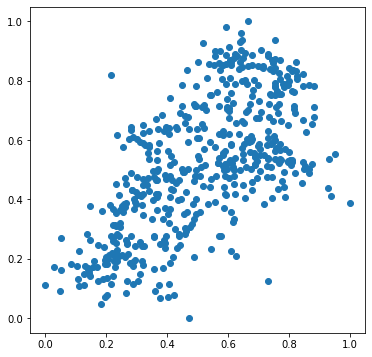

In [13]:
# cnt and atemp
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

In [14]:
df_train1 = df_train
y_train = df_train1.pop('cnt')
X_train = df_train

In [15]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['casual']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [16]:
lr.params

const     0.327377
casual    0.731337
dtype: float64

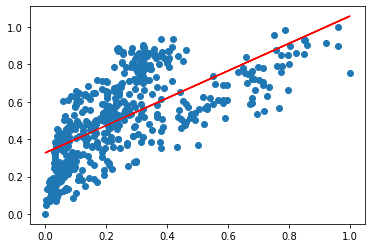

In [17]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.327 + 0.731*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     415.7
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           5.90e-68
Time:                        16:13:25   Log-Likelihood:                 190.96
No. Observations:                 510   AIC:                            -377.9
Df Residuals:                     508   BIC:                            -369.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3274      0.012     27.873      0.0

In [19]:
X_train_lm = X_train[['casual', 'temp']]

In [20]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.178557
casual    0.494016
temp      0.389485
dtype: float64

In [21]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     317.5
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           4.04e-90
Time:                        16:13:25   Log-Likelihood:                 245.56
No. Observations:                 510   AIC:                            -485.1
Df Residuals:                     507   BIC:                            -472.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1786      0.017     10.404      0.0

In [22]:
X_train_lm = X_train[['casual','temp','yr']]

In [23]:
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_lm)


In [24]:
lr= sm.OLS(y_train,X_train_lm).fit()
lr.params

const     0.096764
casual    0.348625
temp      0.413656
yr        0.208396
dtype: float64

In [25]:
print(lr.summary())    #model that is selected because of high r squared value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     525.0
Date:                Sun, 02 Jan 2022   Prob (F-statistic):          6.56e-155
Time:                        16:13:25   Log-Likelihood:                 399.11
No. Observations:                 510   AIC:                            -790.2
Df Residuals:                     506   BIC:                            -773.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0968      0.013      7.260      0.0

In [26]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train.drop('dteday'))

lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()



In [ ]:
lr_1.params


In [ ]:
print(lr_1.summary())

In [28]:
#vif checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif=pd.DataFrame()
vif['features']=X_train.columns

In [ ]:
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

In [ ]:
#vif less than 5 is good so dropping and checking vif again later
X= X_train.drop('yr',1)
X_train_lm=sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

In [ ]:
X= X_train.drop('instant',1)
X_train_lm=sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
X= X_train.drop('yr',1)
X_train_lm=sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

In [35]:
# no use as vif too high to make anyu changes
# using lr model named as 'lr'

In [39]:
num_vars= ['temp'	,'atemp'	,'hum'	,'windspeed',	'casual',	'registered',	'cnt']
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [40]:
df_test.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,356.776256,2.456621,0.479452,6.474886,0.036530,3.018265,0.698630,1.374429,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592
std,213.665198,1.109463,0.500722,3.421875,0.188034,1.988415,0.459904,0.538843,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435
min,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,171.000000,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531
50%,349.000000,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275
75%,537.500000,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [41]:
df_test1 = df_test
y_test= df_test1.pop('cnt')
X_test= df_test

In [42]:
X_test_m= sm.add_constant(X_test)

In [45]:
X_test_m = X_test[['casual','temp','yr','atemp']]

In [46]:
y_pred_m= lr.predict(X_test_m)

Text(0, 0.5, 'y_pred')

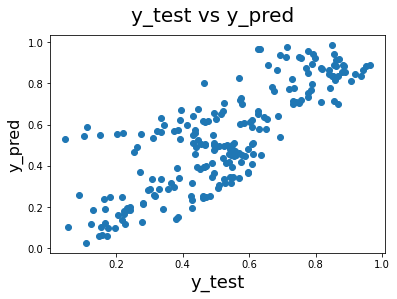

In [47]:

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      